In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
dataset= pd.read_csv('/dataset.csv')
dataset

,MaintenanceFrequency,RotatingPartsSpeed,Status
0,90,266.179349,defective
1,120,188.483505,operational
2,30,352.579652,defective
3,90,257.822752,operational
4,90,220.987403,defective
...,...,...,...
1473,60,261.123048,operational
1474,120,336.434240,operational
1475,120,275.590150,operational
1476,90,351.371077,operational


In [18]:
dataset.describe()

,MaintenanceFrequency,RotatingPartsSpeed
count,1478.000000,1478.000000
mean,74.614344,299.380238
std,34.019093,49.308589
min,30.000000,125.959559
25%,30.000000,265.386240
50%,60.000000,300.370813
75%,120.000000,332.377215
max,120.000000,448.250518


In [20]:
X = dataset[['MaintenanceFrequency', 'RotatingPartsSpeed']]


In [21]:
X

,MaintenanceFrequency,RotatingPartsSpeed
0,90,266.179349
1,120,188.483505
2,30,352.579652
3,90,257.822752
4,90,220.987403
...,...,...
1473,60,261.123048
1474,120,336.434240
1475,120,275.590150
1476,90,351.371077


In [22]:
y = dataset[' Status']
y



0         defective
1       operational
2         defective
3       operational
4         defective
           ...     
1473    operational
1474    operational
1475    operational
1476    operational
1477    operational
Name:  Status, Length: 1478, dtype: object

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [26]:
y_pred = classifier.predict(X_test_scaled)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6790540540540541

Classification Report:
              precision    recall  f1-score   support

   defective       0.12      0.13      0.13        52
 operational       0.81      0.80      0.80       244

    accuracy                           0.68       296
   macro avg       0.47      0.46      0.47       296
weighted avg       0.69      0.68      0.68       296


Confusion Matrix:
[[  7  45]
 [ 50 194]]


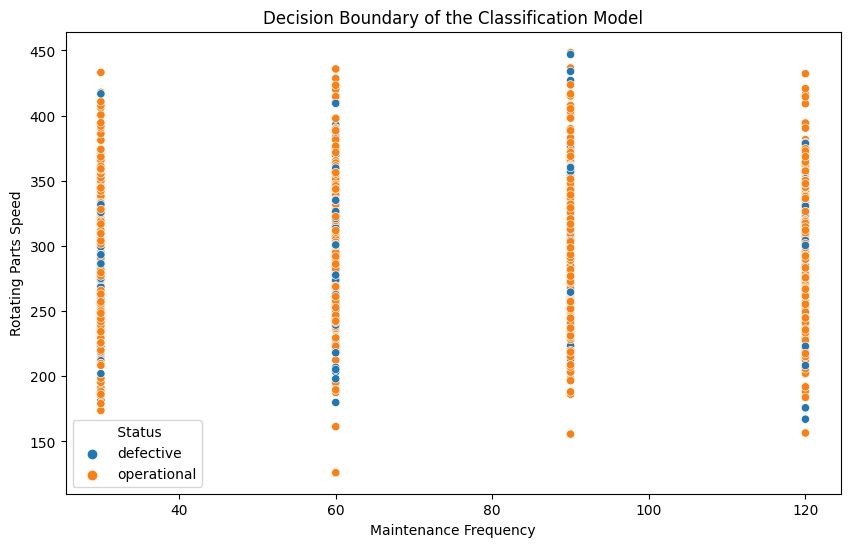

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MaintenanceFrequency', y='RotatingPartsSpeed', hue=' Status', data=dataset)
plt.title('Decision Boundary of the Classification Model')
plt.xlabel('Maintenance Frequency')
plt.ylabel('Rotating Parts Speed')
plt.show()